# Least square problem for polynomial regression 

## import library

In [1637]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data points
- $\{ (x_i, y_i) \}_{i=1}^n$

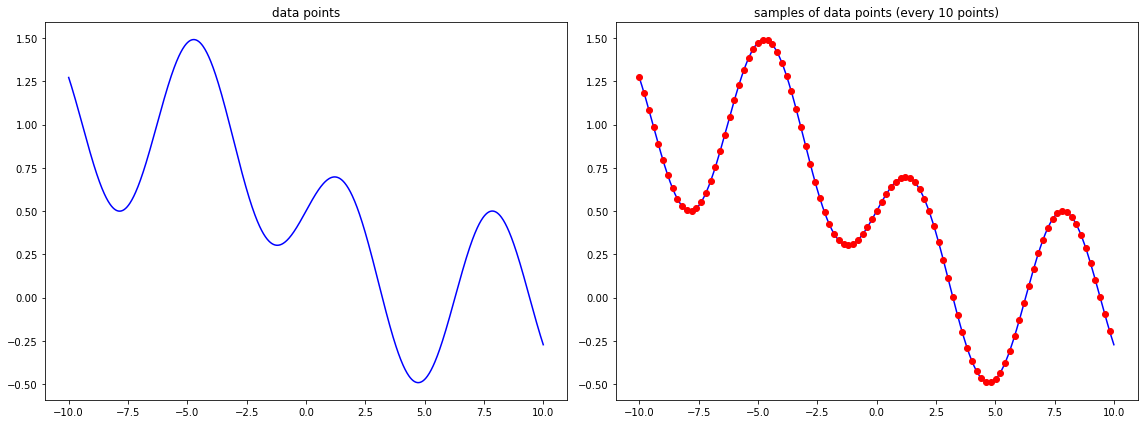

In [1638]:
filename    = 'assignment_05_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

x           = data[0, :]    # independent variable
y           = data[1, :]    # dependent variable

x_sample    = x[::10]       
y_sample    = y[::10]

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color = 'blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x, y, '-', color = 'blue')
plt.plot(x_sample, y_sample, 'o', color = 'red')
plt.title('samples of data points (every 10 points)')

plt.tight_layout()
plt.show()

## construct matrix A for the polynomial regression with power $p-1$
- useful functions : `np.power`

## solve a linear system of equation $A z = b$
$$
A = 
\begin{bmatrix}
x_1^0 & x_1^1 & \cdots & x_1^{p-1}\\
x_2^0 & x_2^1 & \cdots & x_2^{p-1}\\
\vdots & \vdots & \vdots & \vdots\\
x_n^0 & x_n^1 & \cdots & x_n^{p-1}
\end{bmatrix},
\quad
z = 
\begin{bmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_{p-1}
\end{bmatrix},
\quad
b = 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
$$

In [1668]:
def construct_matrix_A(x, p):
    
    n = len(x)
    A = np.zeros([n, p])
    initial=x[...]
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    res = x
    t = []
    for i in range(0, p):
        #res = np.vstack([res, np.power(x,i)])
        t.append(np.power(x,i))
    
    A=np.array(t).T
    #A=np.delete(A,0,axis=1)
    # +++++++++++++++++++++++++++++++++++++++++++++++++
    return A

In [1669]:
data=construct_matrix_A(x,5)

In [1670]:
import pandas as pd
df = pd.DataFrame(data)
df

,0,1,2,3,4
0,1.0,-10.00000,100.000000,-1000.000000,10000.000000
1,1.0,-9.97998,99.600001,-994.006016,9920.160159
2,1.0,-9.95996,99.200803,-988.036032,9840.799356
3,1.0,-9.93994,98.802407,-982.089999,9761.915669
4,1.0,-9.91992,98.404813,-976.167871,9683.507183
...,...,...,...,...,...
995,1.0,9.91992,98.404813,976.167871,9683.507183
996,1.0,9.93994,98.802407,982.089999,9761.915669
997,1.0,9.95996,99.200803,988.036032,9840.799356
998,1.0,9.97998,99.600001,994.006016,9920.160159


## construct vector $b$

In [1641]:
def construct_vector_b(y):

    n = len(y)
    b = np.zeros([n, 1])

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    y=y.T
    b=y
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return b

## solve the linear system of equation $A z = b$
- without regularization : $\min \frac{1}{2 n}\| Az - b \|^2, \quad z = \left( A^T A \right)^{-1} A^T b$
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [1642]:
def solve_regression(x, y, p):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A=construct_matrix_A(x, p)
    z1=np.linalg.pinv(A)
    AT=z1
    b=construct_vector_b(y)
    z=np.matmul(AT,b)
    #z=np.matmul(z1,z2)

    n = len(x)
    loss=(1/(2*n))*(np.sum(np.square(np.subtract(np.matmul(A,z),b))))

    
    
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

- with regularization : $\min \frac{1}{2 n} \| A z - b \|^2 + \frac{\alpha}{2} \| z \|^2, \quad z = \left(A^{T} A + n \alpha I \right)^{-1} A^T b$ where $I$ denotes identity matrix
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [1643]:
def solve_regression_with_regularization(x, y, p, alpha):

    z       = np.zeros([p, 1])
    loss    = 0
    n = len(x)
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A=construct_matrix_A(x, p)
    b=construct_vector_b(y)
    
    C=z2=np.matmul(A.T,b)
    C1=(C.shape)[0]
    #I=np.identity(C1)
    A_inv=np.linalg.pinv(A)
    I=np.matmul(A,A_inv)
    print("I.shape ",I.shape)
    #z1=np.matmul(np.linalg.inv(np.add(np.matmul(A.T,A),(np.matmul(n*alpha,I).T))))
    z1=np.linalg.pinv(np.add(np.matmul(A,A.T),(n*alpha*I)))
    
    z2=np.matmul(A.T,z1)
    #z2=np.matmul(z2,b)
    z=np.matmul(z2,b)
    loss=np.add((1/(2*n))*np.sum((np.square(np.subtract(np.matmul(A,z),b)))),(alpha/2)*np.sum(np.square(z)))
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

## approximate by polynomial regression
- $ \hat{y} = A z^* $
- useful functions : `np.matmul`

In [1644]:
def approximate(x, y, p):

    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A=construct_matrix_A(x, p)
    

    z,loss=solve_regression(x,y,p)
    
    y_hat=np.matmul(A,z)

    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss


In [1645]:
def approximate_with_regularization(x, y, p, alpha):
    
    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    z,loss=solve_regression_with_regularization(x, y, p, alpha)
    A=construct_matrix_A(x, p)
    y_hat=np.matmul(A,z)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss

___

___

## functions for presenting the results

___

___

In [1646]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.title('data points')
    plt.show()

In [1647]:
def function_result_02():

    p           = 2
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1648]:
def function_result_03():

    p           = 4
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1649]:
def function_result_04():

    p           = 8
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1650]:
def function_result_05():

    p           = 16
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1651]:
def function_result_06():

    p           = 32 
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1652]:
def function_result_07():

    p           = 2 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1653]:
def function_result_08():

    p           = 4 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1654]:
def function_result_09():

    p           = 8 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1655]:
def function_result_10():

    p           = 16 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1656]:
def function_result_11():

    p           = 32 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1657]:
def function_result_12():

    p           = 4
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [1658]:
def function_result_13():

    p           = 16
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [1659]:
def function_result_14():

    p           = 4
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

In [1660]:
def function_result_15():

    p           = 16 
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


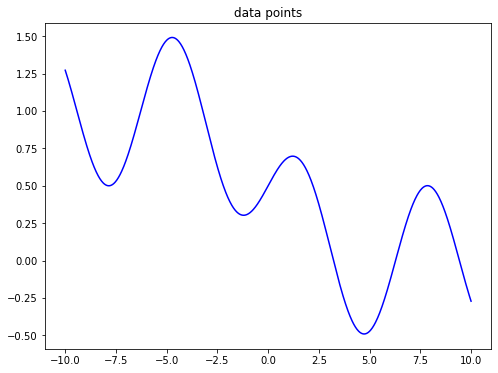

**************************************************
## [RESULT 02]
**************************************************


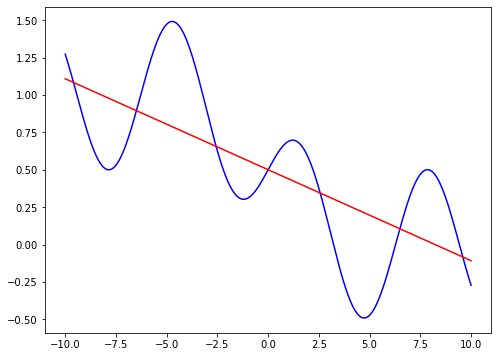

**************************************************
## [RESULT 03]
**************************************************


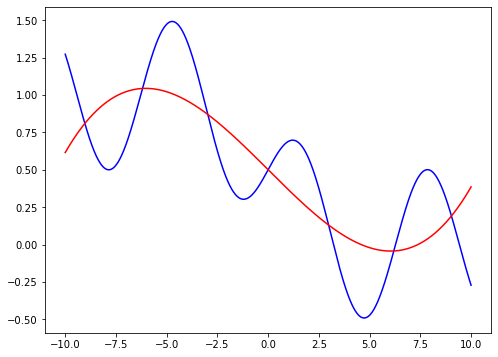

**************************************************
## [RESULT 04]
**************************************************


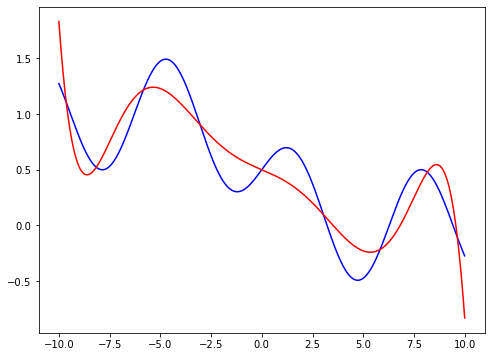

**************************************************
## [RESULT 05]
**************************************************


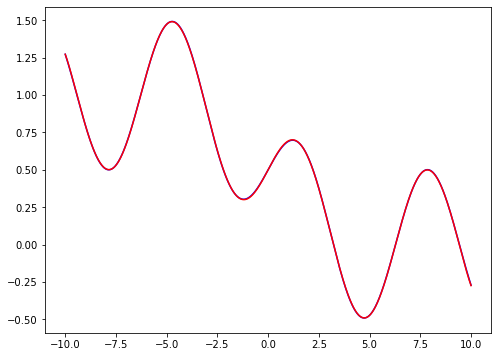

**************************************************
## [RESULT 06]
**************************************************


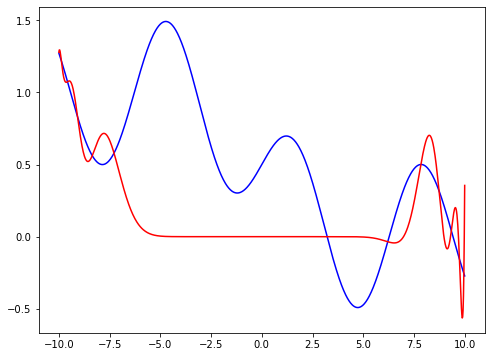

**************************************************
## [RESULT 07]
**************************************************
I.shape  (1000, 1000)


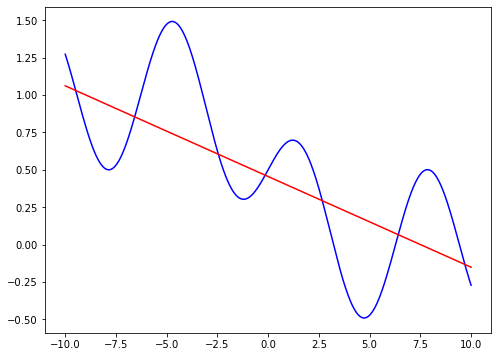

**************************************************
## [RESULT 08]
**************************************************
I.shape  (1000, 1000)


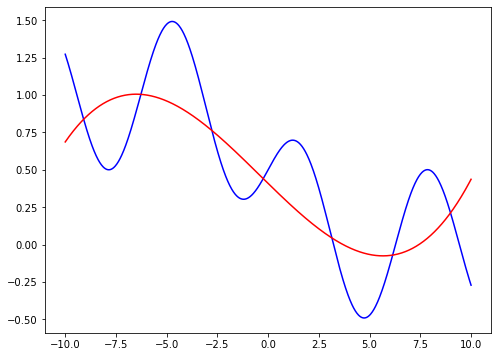

**************************************************
## [RESULT 09]
**************************************************
I.shape  (1000, 1000)


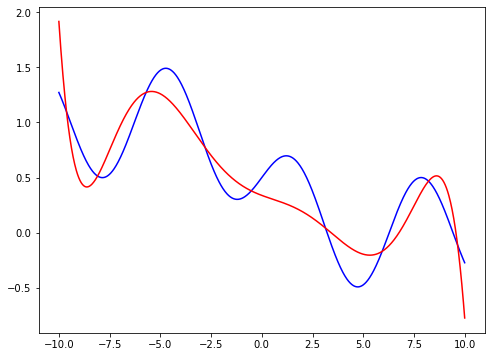

**************************************************
## [RESULT 10]
**************************************************
I.shape  (1000, 1000)


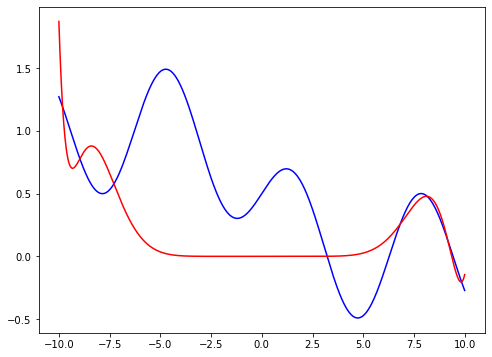

**************************************************
## [RESULT 11]
**************************************************
I.shape  (1000, 1000)


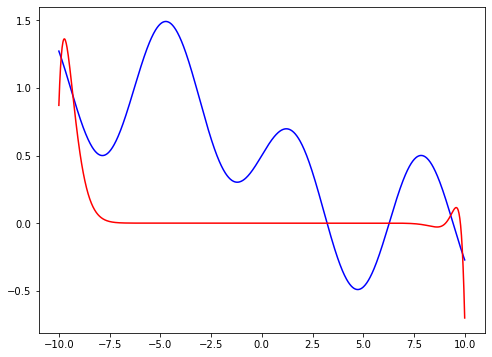

**************************************************
## [RESULT 12]
**************************************************
loss =  0.052697806863259415
**************************************************
## [RESULT 13]
**************************************************
loss =  1.7955542961308408e-06
**************************************************
## [RESULT 14]
**************************************************
I.shape  (1000, 1000)
loss =  0.06379867384617091
**************************************************
## [RESULT 15]
**************************************************
I.shape  (1000, 1000)
loss =  0.19084523958733982


In [1661]:
number_result = 15

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)